In [84]:
#requires tensorflow2
import tensorflow as tf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import keras
import numpy as np
from ads_utils import load_data, plot, Environment

In [85]:
INITIAL_BALANCE = 10_000
PAST_TICKS = 5
        
'''NOTE: there is no train/test split yet'''            
data = load_data([i for i in range(1,5)])

fake = np.linspace(100, 200, len(data))
data['close1'] = fake
fake = np.linspace(200, 100, len(data))
data['close2'] = fake
fake = 10*np.sin(np.linspace(0, 3141.592, len(data))/50) + 20
data['close3'] = fake
fake = 100*np.sin(np.linspace(0, 3141.592, len(data))/50) + np.random.normal(1000, 50, len(data))
data['close4'] = fake
fake = np.random.normal(1000, 50, len(data))
data['close5'] = fake
fake = 1000 - np.abs(np.arange(0, len(data)) - len(data)/2) * 0.05
data['close6'] = fake
fake = np.random.normal(1000, 50, len(data)) - np.abs(np.arange(0, len(data)) - len(data)/2) * 0.05
data['close7'] = fake

envs = []
for col in ['close'] + [f'close{i}' for i in range(1, 8)]:
    env = Environment(data[col].to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)
    envs.append(env)

In [86]:
data

,time,close,volume,close1,close2,close3,close4,close5,close6,close7
0,2020-06-02 04:56:00,2475.00,275,100.000000,200.000000,20.000000,935.073469,1106.553584,-52.275,-124.878694
1,2020-06-02 04:57:00,2475.00,710,100.002376,199.997624,20.014928,1003.411640,925.000851,-52.225,20.464590
2,2020-06-02 04:59:00,2475.00,177,100.004752,199.995248,20.029856,1019.321074,1009.775243,-52.175,-21.631764
3,2020-06-02 05:20:00,2478.03,186,100.007128,199.992872,20.044784,1005.797009,1004.410988,-52.125,-50.215124
4,2020-06-02 05:22:00,2478.70,123,100.009503,199.990497,20.059712,1059.897945,901.362687,-52.075,-76.573473
...,...,...,...,...,...,...,...,...,...,...
42086,2020-09-29 19:37:00,3152.00,311,199.990497,100.009503,19.940158,994.366622,1100.962915,-52.025,-20.131616
42087,2020-09-29 19:38:00,3151.01,200,199.992872,100.007128,19.955086,1028.941287,1066.354684,-52.075,62.931203
42088,2020-09-29 19:41:00,3150.00,201,199.995248,100.004752,19.970013,1032.102717,968.416016,-52.125,-113.646155
42089,2020-09-29 19:59:00,3149.06,622,199.997624,100.002376,19.984941,965.631882,1005.690986,-52.175,18.765190


In [87]:
dataset = np.reshape(data['close'].values,(-1,1))

In [88]:
scaled_dataset = dataset

In [89]:
train= scaled_dataset[:int(scaled_dataset.shape[0]*0.75)]
valid = scaled_dataset[int(scaled_dataset.shape[0]*0.75)-60:]

In [90]:
#if feature scaling desired
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))


In [91]:
train2 = sc.fit_transform(train)

In [92]:
valid2 = sc.transform(valid)

In [93]:
x_train,y_train,x_test,y_test = [],[],[],[]
for i in range(60,train2.shape[0]):
    x_train.append(train2[i-60:i,0])
    y_train.append(train2[i,0])

for z in range(60,valid2.shape[0]):
    x_test.append(valid2[z-60:z,0])
    y_test.append(valid2[z,0])

In [94]:
x_train, y_train,x_test,y_test = np.array(x_train), np.array(y_train),np.array(x_test),np.array(y_test)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

Epoch 1/50
438/438 [==============================] - 40s 91ms/step - loss: 0.0174 - val_loss: 3.4361e-04
Epoch 2/50
438/438 [==============================] - 44s 101ms/step - loss: 0.0059 - val_loss: 1.6977e-04
Epoch 3/50
438/438 [==============================] - 42s 96ms/step - loss: 0.0046 - val_loss: 1.4569e-04
Epoch 4/50
438/438 [==============================] - 41s 94ms/step - loss: 0.0038 - val_loss: 1.4093e-04
Epoch 5/50
438/438 [==============================] - 41s 94ms/step - loss: 0.0034 - val_loss: 1.6208e-04
Epoch 6/50
438/438 [==============================] - 41s 93ms/step - loss: 0.0032 - val_loss: 1.8332e-04
Epoch 7/50
438/438 [==============================] - 44s 100ms/step - loss: 0.0030 - val_loss: 1.5729e-04
Epoch 8/50
438/438 [==============================] - 42s 95ms/step - loss: 0.0028 - val_loss: 1.9705e-04
Epoch 9/50
438/438 [==============================] - 40s 92ms/step - loss: 0.0028 - val_loss: 1.5922e-04
Epoch 10/50
438/438 [=======================

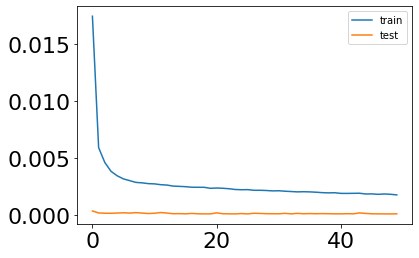

In [95]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(units=100,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(1))
ADAM = Adam(0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=ADAM)
history = model.fit(x_train,y_train,epochs=50,batch_size=72,validation_data=(x_test,y_test),verbose=1,shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
def update_model(model, train, batch_size, updates):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	for i in range(updates):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()

In [96]:
predicted_stock_price = sc.inverse_transform(model.predict(x_test))

In [97]:
actual_stock_price = sc.inverse_transform(y_test.reshape((-1,1)))

No handles with labels found to put in legend.


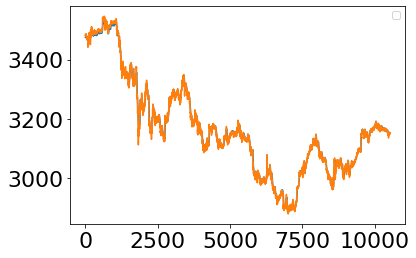

In [98]:
plt.plot(predicted_stock_price)
plt.plot(actual_stock_price)
plt.legend()
plt.show()

In [76]:
#computing profitability
answers = [INITIAL_BALANCE]

In [77]:
actions = []
portfolio_values = [INITIAL_BALANCE]
balance = INITIAL_BALANCE
for i in range(1,len(predicted_stock_price)):
    if predicted_stock_price[i]>actual_stock_price[i-1]:
        #go long
        balance += actual_stock_price[i]-actual_stock_price[i-1]
        actions.append(2)
    else:
        #go short
        balance += actual_stock_price[i-1]-actual_stock_price[i]
        actions.append(0)
    portfolio_values.append(float(balance))

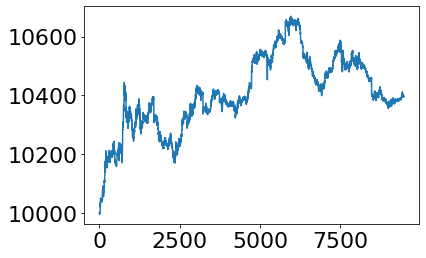

In [78]:
plt.plot(portfolio_values)

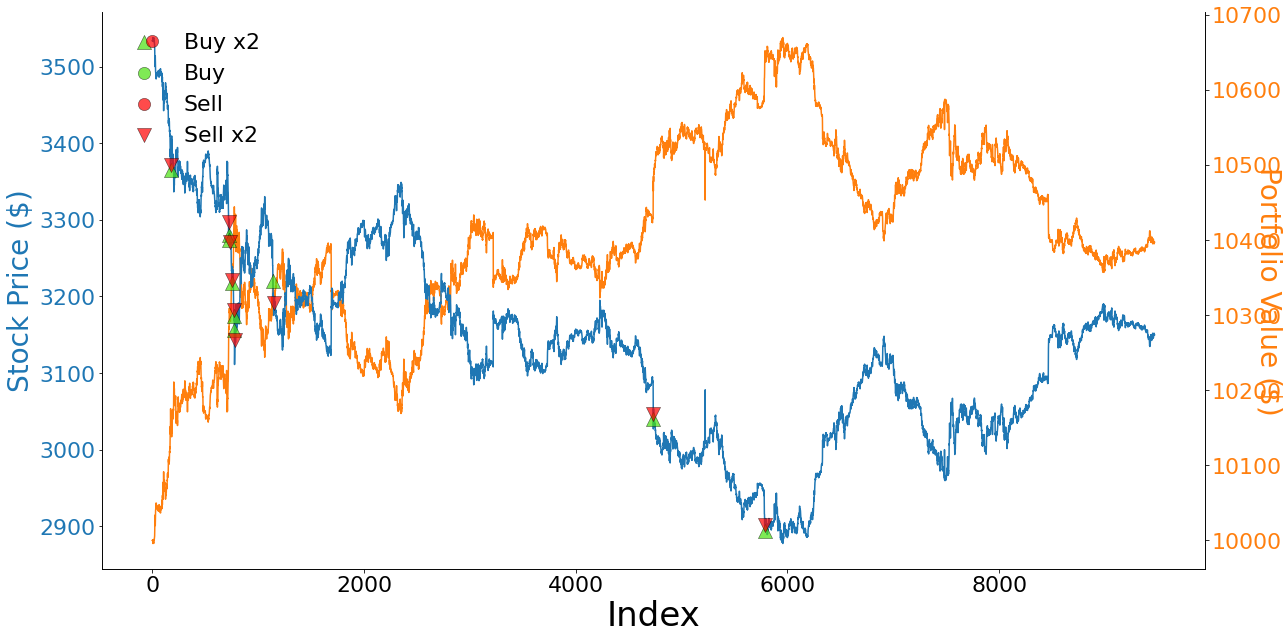

In [79]:
plot(prices=actual_stock_price,target_positions = actions,portfolio_values = portfolio_values)